# Análise dos modelos com o Cenário 1

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plot_metric.functions import BinaryClassification
from sklearn.model_selection import GridSearchCV

## Cenário 1

In [2]:
data1_200 = pd.read_csv('Cenario1_200000.csv')
data1_200.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,idade,classe_economica_familiar,renda,despesa_saude,responsavel_renda_familiar,trabalho,...,ativo,cartao,valor_fatura,fatura_atraso,nome_negativado,porc_paga_fatura,cpf_ativo,score_fraude_maior_ponto_corte,foto_semelhante_documento,fraude
0,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),49,Classe média,3.58,0.04,1,Trabalha regularmente,...,1,1,0.21,0,0,1.0,1,0,1,0
1,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),56,Classe baixa,1.33,0.23,1,Trabalha regularmente,...,0,1,0.32,0,1,1.0,1,0,1,0
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),51,Classe média,4.29,0.08,1,Trabalha regularmente,...,1,0,0.00,0,0,1.0,1,0,1,0
3,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Viúvo(a),73,Classe baixa,1.42,0.04,1,Trabalha regularmente,...,0,1,0.45,0,0,1.0,1,0,1,0
4,Masculino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Casado(a),75,Classe baixa,1.82,0.13,1,Trabalha regularmente,...,0,1,0.30,0,0,1.0,1,0,1,0


In [3]:
data1_100 = pd.read_csv('Cenario1_100000.csv')
data1_100.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,idade,classe_economica_familiar,renda,despesa_saude,responsavel_renda_familiar,trabalho,...,ativo,cartao,valor_fatura,fatura_atraso,nome_negativado,porc_paga_fatura,cpf_ativo,score_fraude_maior_ponto_corte,foto_semelhante_documento,fraude
0,Feminino,Ensino fundamental completo e médio incompleto,Idoso (acima de 60 anos),Viúvo(a),68,Classe média,5.11,0.08,1,Estudante,...,0,1,0.27,0,0,1.0,1,0,1,0
1,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Divorciado(a),62,Classe baixa,1.38,0.10,1,Trabalha regularmente,...,1,0,0.00,0,0,1.0,1,0,1,0
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),27,Classe baixa,0.68,0.22,0,Trabalha regularmente,...,0,0,0.00,0,0,1.0,1,0,1,0
3,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),23,Classe média,2.49,0.32,0,Trabalha regularmente,...,1,1,0.07,0,1,1.0,1,0,1,0
4,Masculino,Sem instrução e ensino fundamental incompleto,Adulto (de 20 à 59 anos),Casado(a),34,Elite,21.07,0.16,1,Trabalha regularmente,...,0,1,0.18,0,0,1.0,1,0,1,0


In [4]:
data1_50 = pd.read_csv('Cenario1_50000.csv')
data1_50.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,idade,classe_economica_familiar,renda,despesa_saude,responsavel_renda_familiar,trabalho,...,ativo,cartao,valor_fatura,fatura_atraso,nome_negativado,porc_paga_fatura,cpf_ativo,score_fraude_maior_ponto_corte,foto_semelhante_documento,fraude
0,Feminino,Sem instrução e ensino fundamental incompleto,Idoso (acima de 60 anos),Viúvo(a),76,Classe média,5.29,0.07,1,Desempregado,...,0,1,0.22,0,0,1.0,1,0,1,0
1,Masculino,Sem instrução e ensino fundamental incompleto,Adulto (de 20 à 59 anos),Solteiro(a),54,Classe média,3.80,0.23,1,Trabalha regularmente,...,1,1,0.25,0,0,1.0,1,0,1,0
2,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),39,Classe média,2.54,0.13,0,Trabalha regularmente,...,1,1,0.39,0,0,1.0,1,0,1,0
3,Feminino,Sem instrução e ensino fundamental incompleto,Idoso (acima de 60 anos),Casado(a),77,Classe média,4.87,0.08,1,Trabalha regularmente,...,1,1,0.58,0,0,1.0,1,0,1,0
4,Masculino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),37,Classe média,2.55,0.28,0,Trabalha regularmente,...,1,1,0.14,1,1,0.2,1,0,1,0


In [5]:
for data1 in [data1_200, data1_100, data1_50]:
    data1 = data1.rename(columns={"porc_paga_fatura ": "porc_paga_fatura"})
    
    # Tranformando a renda em reais e não em quantidade de salários 
    data1['renda'] = data1['renda']*1100
    # A variavel despesa_saude foi criada pra ser a proporção de gastos com saude em relação a renda
    data1['despesa_saude'] = data1['despesa_saude'] * data1['renda']
    # A variável valor da fatura do cartão foi criada para ser a porcentagem em relação ao salário da pessoa
    data1['valor_fatura'] = data1['valor_fatura'] * data1['renda']
    # A variável porcentagem paga da fatura é o quanto foi pago da fatura
    data1['porc_paga_fatura'] = data1['valor_fatura'] * data1['porc_paga_fatura']

In [6]:
data1_200 = pd.get_dummies(data1_200, drop_first=True)
# Alterando o nome das variáveis 
data1_200 = data1_200.rename(columns={'estado_civil_Divorciado(a)': 'estado_civil_divorciado','estado_civil_Solteiro(a)':'estado_civil_solteiro', 
                    'estado_civil_Viúvo(a)': 'estado_civil_viuvo', 'classe_economica_familiar_Elite':'classe_economica_familiar_elite',
                    'classe_economica_familiar_Classe média':'classe_economica_familiar_classe_media','sexo_Masculino': 'sexo_masculino',
                    'faixa_etaria_Idoso (acima de 60 anos)':'faixa_etaria_idoso','faixa_etaria_Jovem (até 19 anos)':'faixa_etaria_jovem',
                    'nivel_escolaridade_Ensino médio completo e superior incompleto':'nivel_escolaridade_medio_completo_sup_incompleto',
                    'nivel_escolaridade_Sem instrução e ensino fundamental incompleto':'nivel_escolaridade_sem_instrucao_fund_incompleto',
                    'nivel_escolaridade_Ensino superior completo':'nivel_escolaridade_sup_completo','casa_Cedida': 'casa_cedida',
                    'casa_Própria': 'casa_propria', 'tempo_trabalho_4 a 7 anos':'tempo_trabalho_quatro_a_sete',
                    'trabalho_Estudante': 'trabalho_estudante','trabalho_Trabalha regularmente': 'trabalho_trabalha_regularmente', 
                    'tempo_trabalho_Mais de 7 anos':'tempo_trabalho_mais_sete', 'tempo_trabalho_Menos de 1 ano':'tempo_trabalho_menos_um', 
                     'regiao_Nordeste':'regiao_nordeste', 'regiao_Norte':'regiao_norte', 'regiao_Sudeste':'regiao_sudeste', 
                    'regiao_Sul':'regiao_sul', 'tempo_trabalho_Sem emprego':'tempo_trabalho_sem_emprego'})
data1_200['fraude'] = data1_200['fraude'].astype('category')

data1_100 = pd.get_dummies(data1_100, drop_first=True)
# Alterando o nome das variáveis 
data1_100 = data1_100.rename(columns={'estado_civil_Divorciado(a)': 'estado_civil_divorciado','estado_civil_Solteiro(a)':'estado_civil_solteiro', 
                    'estado_civil_Viúvo(a)': 'estado_civil_viuvo', 'classe_economica_familiar_Elite':'classe_economica_familiar_elite',
                    'classe_economica_familiar_Classe média':'classe_economica_familiar_classe_media','sexo_Masculino': 'sexo_masculino',
                    'faixa_etaria_Idoso (acima de 60 anos)':'faixa_etaria_idoso','faixa_etaria_Jovem (até 19 anos)':'faixa_etaria_jovem',
                    'nivel_escolaridade_Ensino médio completo e superior incompleto':'nivel_escolaridade_medio_completo_sup_incompleto',
                    'nivel_escolaridade_Sem instrução e ensino fundamental incompleto':'nivel_escolaridade_sem_instrucao_fund_incompleto',
                    'nivel_escolaridade_Ensino superior completo':'nivel_escolaridade_sup_completo','casa_Cedida': 'casa_cedida',
                    'casa_Própria': 'casa_propria', 'tempo_trabalho_4 a 7 anos':'tempo_trabalho_quatro_a_sete',
                    'trabalho_Estudante': 'trabalho_estudante','trabalho_Trabalha regularmente': 'trabalho_trabalha_regularmente', 
                    'tempo_trabalho_Mais de 7 anos':'tempo_trabalho_mais_sete', 'tempo_trabalho_Menos de 1 ano':'tempo_trabalho_menos_um', 
                     'regiao_Nordeste':'regiao_nordeste', 'regiao_Norte':'regiao_norte', 'regiao_Sudeste':'regiao_sudeste', 
                    'regiao_Sul':'regiao_sul', 'tempo_trabalho_Sem emprego':'tempo_trabalho_sem_emprego'})
data1_100['fraude'] = data1_100['fraude'].astype('category')

data1_50 = pd.get_dummies(data1_50, drop_first=True)
# Alterando o nome das variáveis 
data1_50 = data1_50.rename(columns={'estado_civil_Divorciado(a)': 'estado_civil_divorciado','estado_civil_Solteiro(a)':'estado_civil_solteiro', 
                    'estado_civil_Viúvo(a)': 'estado_civil_viuvo', 'classe_economica_familiar_Elite':'classe_economica_familiar_elite',
                    'classe_economica_familiar_Classe média':'classe_economica_familiar_classe_media','sexo_Masculino': 'sexo_masculino',
                    'faixa_etaria_Idoso (acima de 60 anos)':'faixa_etaria_idoso','faixa_etaria_Jovem (até 19 anos)':'faixa_etaria_jovem',
                    'nivel_escolaridade_Ensino médio completo e superior incompleto':'nivel_escolaridade_medio_completo_sup_incompleto',
                    'nivel_escolaridade_Sem instrução e ensino fundamental incompleto':'nivel_escolaridade_sem_instrucao_fund_incompleto',
                    'nivel_escolaridade_Ensino superior completo':'nivel_escolaridade_sup_completo','casa_Cedida': 'casa_cedida',
                    'casa_Própria': 'casa_propria', 'tempo_trabalho_4 a 7 anos':'tempo_trabalho_quatro_a_sete',
                    'trabalho_Estudante': 'trabalho_estudante','trabalho_Trabalha regularmente': 'trabalho_trabalha_regularmente', 
                    'tempo_trabalho_Mais de 7 anos':'tempo_trabalho_mais_sete', 'tempo_trabalho_Menos de 1 ano':'tempo_trabalho_menos_um', 
                     'regiao_Nordeste':'regiao_nordeste', 'regiao_Norte':'regiao_norte', 'regiao_Sudeste':'regiao_sudeste', 
                    'regiao_Sul':'regiao_sul', 'tempo_trabalho_Sem emprego':'tempo_trabalho_sem_emprego'})
data1_50['fraude'] = data1_50['fraude'].astype('category')

In [7]:
data1_200.head()

,idade,renda,despesa_saude,responsavel_renda_familiar,conta,ativo,cartao,valor_fatura,fatura_atraso,nome_negativado,...,tempo_trabalho_quatro_a_sete,tempo_trabalho_mais_sete,tempo_trabalho_menos_um,tempo_trabalho_sem_emprego,casa_cedida,casa_propria,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,49,3.58,0.04,1,1,1,1,0.21,0,0,...,0,0,0,0,1,0,1,0,0,0
1,56,1.33,0.23,1,0,0,1,0.32,0,1,...,0,0,0,0,0,1,1,0,0,0
2,51,4.29,0.08,1,1,1,0,0.00,0,0,...,1,0,0,0,1,0,0,0,0,0
3,73,1.42,0.04,1,0,0,1,0.45,0,0,...,1,0,0,0,0,0,0,0,1,0
4,75,1.82,0.13,1,0,0,1,0.30,0,0,...,0,0,0,0,0,1,0,0,1,0


### n = 200.000

###### Dividindo a base em treino e teste

In [8]:
np.random.seed(71)
X2_train, X2_test, y2_train, y2_test = train_test_split(data1_200.drop('fraude',axis=1),data1_200['fraude'],test_size=0.3)

# Verificando as formas dos dados:
X2_train.shape,X2_test.shape

((140000, 37), (60000, 37))

#### Árvore de Decisão

In [9]:
# Instânciando o objeto classificador:
tree = DecisionTreeClassifier(random_state=0)

# Treinando o modelo de arvore de decisão:
tree = tree.fit(X2_train,y2_train)

In [10]:
#Encontrando os melhores parâmetros
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         'criterion' :['gini', 'entropy']}

gcv = GridSearchCV(estimator=tree,
                   param_grid=params,
                  verbose=1,
                  n_jobs=-1)
gcv.fit(X2_train,y2_train)

gcv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.0min finished


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       random_state=0)

In [11]:
# Melhor modelo encontrado
clf2 = gcv.best_estimator_

# Treinando o modelo de arvore de decisão:
clf2 = clf2.fit(X2_train,y2_train)

# Verificando as classificações feitas na base teste
y2_pred = clf2.predict(X2_test)

###### Variaveis mais importantes

No handles with labels found to put in legend.


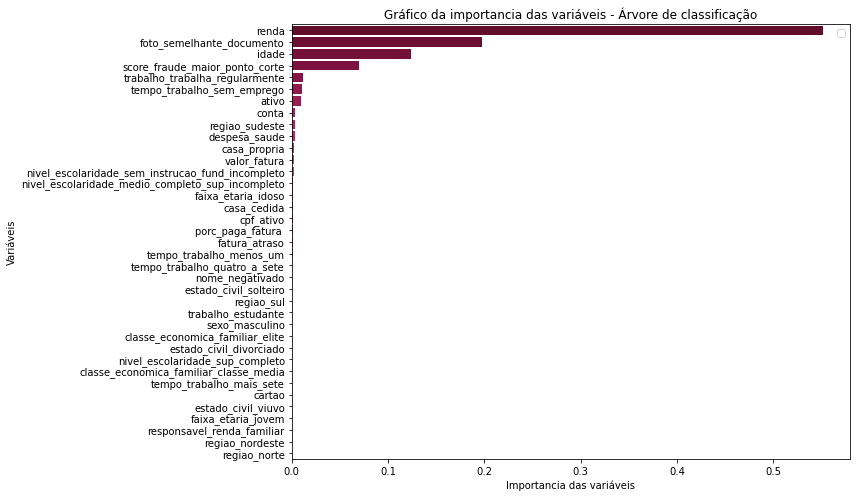

In [12]:
feature_imp = pd.Series(clf2.feature_importances_,index=data1_200.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Árvore de classificação")
plt.legend()
plt.show()

#### Floresta Aleatória

In [13]:
# Instânciando o objeto classificador:
rfc = RandomForestClassifier(random_state=0) 

# Treinando o modelo floresta aleatória 
rfc.fit(X2_train,y2_train) 

RandomForestClassifier(random_state=0)

In [14]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
grfc.fit(X2_train,y2_train)

grfc.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 20.7min finished


RandomForestClassifier(max_depth=8, n_estimators=500, random_state=0)

In [15]:
# Melhor modelo encontrado
rfc2 = grfc.best_estimator_

# Treinando o modelo de arvore de decisão:
rfc2 = rfc2.fit(X2_train,y2_train)

# Verificando as classificações feitas na base teste
y2_pred_rf = rfc2.predict(X2_test)

###### Variaveis mais importantes

No handles with labels found to put in legend.


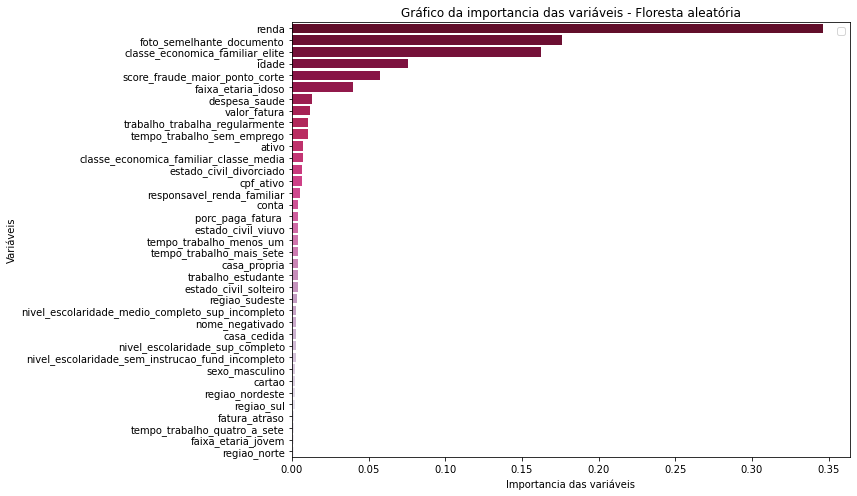

In [16]:
feature_imp = pd.Series(rfc2.feature_importances_,index=data1_200.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Floresta aleatória")
plt.legend()
plt.show()

#### Comparação das duas tecnicas 

In [17]:
# Função que calcula as métricas
def metricas(sS, fS, sF, fF):
    N = sS + fS + sF + fF
    s = sF + sS
    S = fS + sS
    f = fS + fF
    F = sF + fF
    CAT = (sS + fF)/ N
    CAS = sS/S
    CAF = fF/F
    VPP = sS/s
    VPN = fS/f
    PVL = S/N
    MCC = (sS*fF - sF*fS)/np.sqrt(s*S*f*F)
    print("CAT = ",round(CAT,3))
    print("CAS = ",round(CAS,3))
    print("CAF = ",round(CAF,3))
    print("VPP = ",round(VPP,3))
    print("VPN = ",round(VPN,3))
    print("PVL = ",round(PVL,3))
    print("MCC = ",round(PVL,3))

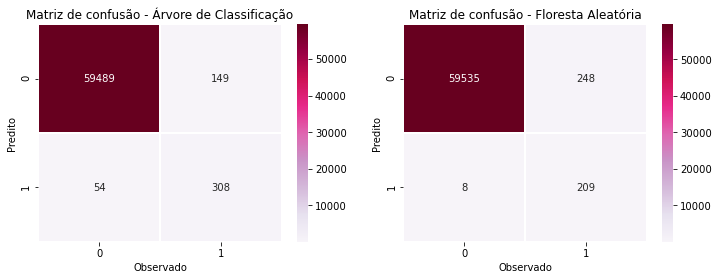

In [18]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix2 = pd.crosstab(y2_pred, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix2, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix2_rf = pd.crosstab(y2_pred_rf, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix2_rf, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

In [19]:
metricas(confusion_matrix2.iloc[1,1], confusion_matrix2.iloc[0,1], confusion_matrix2.iloc[1,0], confusion_matrix2.iloc[0,0])

CAT =  0.997
CAS =  0.674
CAF =  0.999
VPP =  0.851
VPN =  0.002
PVL =  0.008
MCC =  0.008


In [20]:
metricas(confusion_matrix2_rf.iloc[1,1], confusion_matrix2_rf.iloc[0,1], confusion_matrix2_rf.iloc[1,0], confusion_matrix2_rf.iloc[0,0])

CAT =  0.996
CAS =  0.457
CAF =  1.0
VPP =  0.963
VPN =  0.004
PVL =  0.008
MCC =  0.008


### n = 100.000

###### Dividindo a base em treino e teste

In [21]:
np.random.seed(71)
X1_train, X1_test, y1_train, y1_test = train_test_split(data1_100.drop('fraude',axis=1),data1_100['fraude'],test_size=0.3)

# Verificando as formas dos dados:
X1_train.shape,X1_test.shape

((70000, 37), (30000, 37))

#### Árvore de Decisão

In [22]:
# Instânciando o objeto classificador:
tree = DecisionTreeClassifier(random_state=0)

# Treinando o modelo de arvore de decisão:
tree = tree.fit(X1_train,y1_train)

In [23]:
#Encontrando os melhores parâmetros
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         'criterion' :['gini', 'entropy']}

gcv = GridSearchCV(estimator=tree,
                   param_grid=params,
                  verbose=1,
                  n_jobs=-1)
gcv.fit(X1_train,y1_train)

gcv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   43.3s finished


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [24]:
# Melhor modelo encontrado
clf1 = gcv.best_estimator_

# Treinando o modelo de arvore de decisão:
clf1 = clf1.fit(X1_train,y1_train)

# Verificando as classificações feitas na base teste
y1_pred = clf1.predict(X1_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


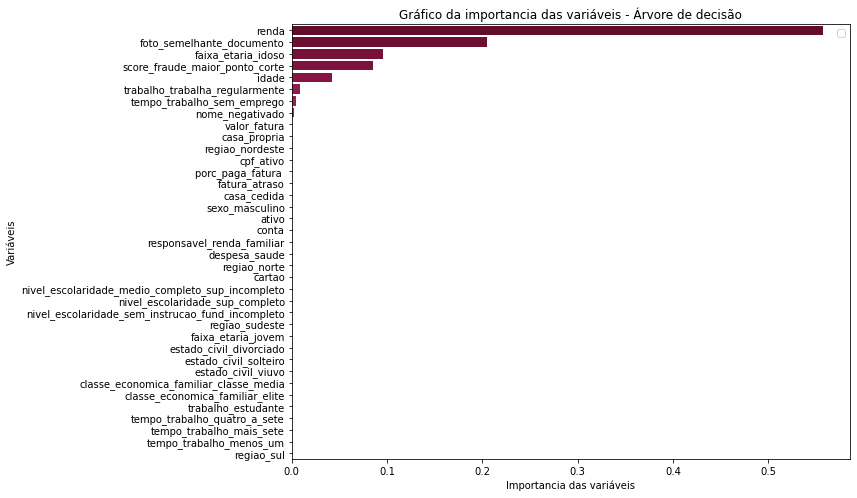

In [25]:
feature_imp = pd.Series(clf1.feature_importances_,index=data1_100.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Árvore de decisão")
plt.legend()
plt.show()

#### Floresta Aleatória

In [26]:
# Instânciando o objeto classificador:
rfc = RandomForestClassifier(random_state=0) 

# Treinando o modelo floresta aleatória 
rfc.fit(X1_train,y1_train) 

RandomForestClassifier(random_state=0)

In [27]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
grfc.fit(X1_train,y1_train)

grfc.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 11.4min finished


RandomForestClassifier(max_depth=8, n_estimators=500, random_state=0)

In [28]:
# Melhor modelo encontrado
rfc1 = grfc.best_estimator_

# Treinando o modelo de arvore de decisão:
rfc1 = rfc1.fit(X1_train,y1_train)

# Verificando as classificações feitas na base teste
y1_pred_rf = rfc1.predict(X1_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


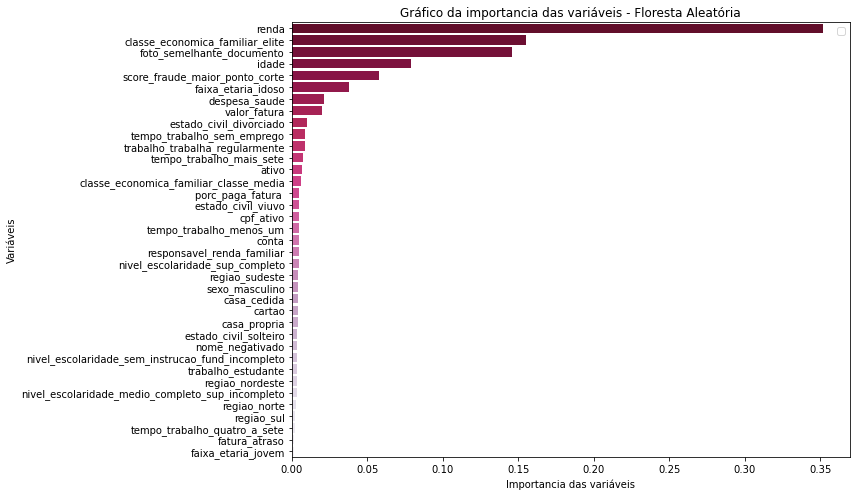

In [29]:
feature_imp = pd.Series(rfc1.feature_importances_,index=data1_100.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Floresta Aleatória")
plt.legend()
plt.show()

#### Comparando as técnicas

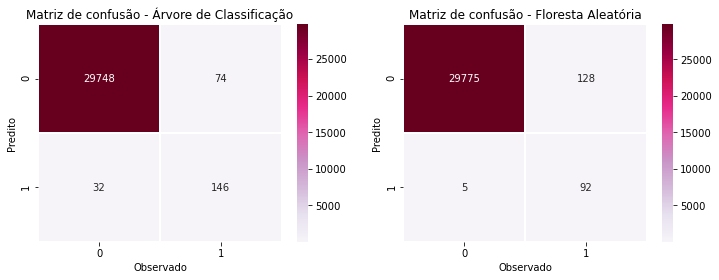

In [30]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix1 = pd.crosstab(y1_pred, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix1, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix1_rf = pd.crosstab(y1_pred_rf, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix1_rf, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

In [31]:
metricas(confusion_matrix1.iloc[1,1], confusion_matrix1.iloc[0,1], confusion_matrix1.iloc[1,0], confusion_matrix1.iloc[0,0])

CAT =  0.996
CAS =  0.664
CAF =  0.999
VPP =  0.82
VPN =  0.002
PVL =  0.007
MCC =  0.007


In [32]:
metricas(confusion_matrix1_rf.iloc[1,1], confusion_matrix1_rf.iloc[0,1], confusion_matrix1_rf.iloc[1,0], confusion_matrix1_rf.iloc[0,0])

CAT =  0.996
CAS =  0.418
CAF =  1.0
VPP =  0.948
VPN =  0.004
PVL =  0.007
MCC =  0.007


### n = 50.000

###### Dividindo a base em treino e teste

In [33]:
np.random.seed(71)
X5_train, X5_test, y5_train, y5_test = train_test_split(data1_50.drop('fraude',axis=1),data1_50['fraude'],test_size=0.3)

# Verificando as formas dos dados:
X5_train.shape,X5_test.shape

((35000, 37), (15000, 37))

#### Árvore de Decisão

In [34]:
# Instânciando o objeto classificador:
tree = DecisionTreeClassifier(random_state=0)

# Treinando o modelo de arvore de decisão:
tree = tree.fit(X5_train,y5_train)

In [35]:
#Encontrando os melhores parâmetros
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         'criterion' :['gini', 'entropy']}

gcv = GridSearchCV(estimator=tree,
                   param_grid=params,
                  verbose=1,
                  n_jobs=-1)
gcv.fit(X5_train,y5_train)

gcv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.2s finished


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [36]:
# Melhor modelo encontrado
clf5 = gcv.best_estimator_

# Treinando o modelo de arvore de decisão:
clf5 = clf5.fit(X5_train,y5_train)

# Verificando as classificações feitas na base teste
y5_pred = clf5.predict(X5_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


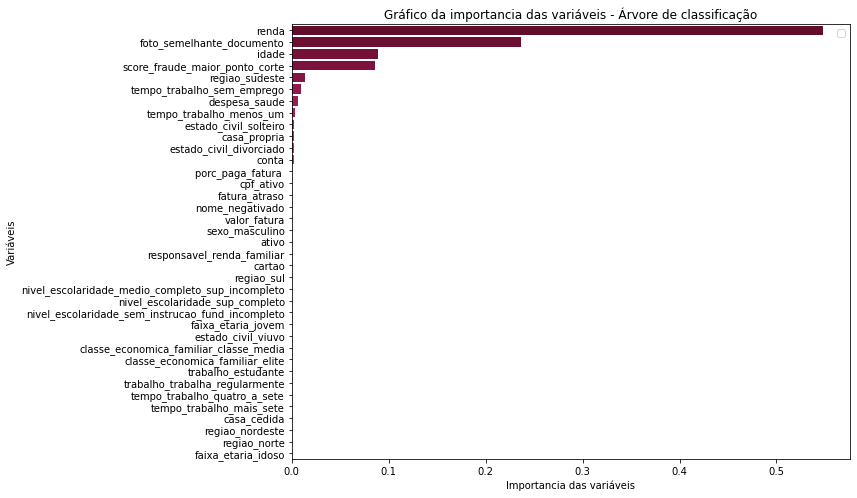

In [37]:
feature_imp = pd.Series(clf5.feature_importances_,index=data1_50.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Árvore de classificação")
plt.legend()
plt.show()

#### Floresta Aleatória

In [50]:
# Instânciando o objeto classificador:
rfc = RandomForestClassifier(random_state=0) 

# Treinando o modelo floresta aleatória 
rfc.fit(X5_train,y5_train) 

RandomForestClassifier(random_state=0)

In [51]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
grfc.fit(X5_train,y5_train)

grfc.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.1min finished


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=0)

In [52]:
# Melhor modelo encontrado
rfc5 = grfc.best_estimator_

# Treinando o modelo de arvore de decisão:
rfc5 = rfc5.fit(X5_train,y5_train)

# Verificando as classificações feitas na base teste
y5_pred_rf = rfc5.predict(X5_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


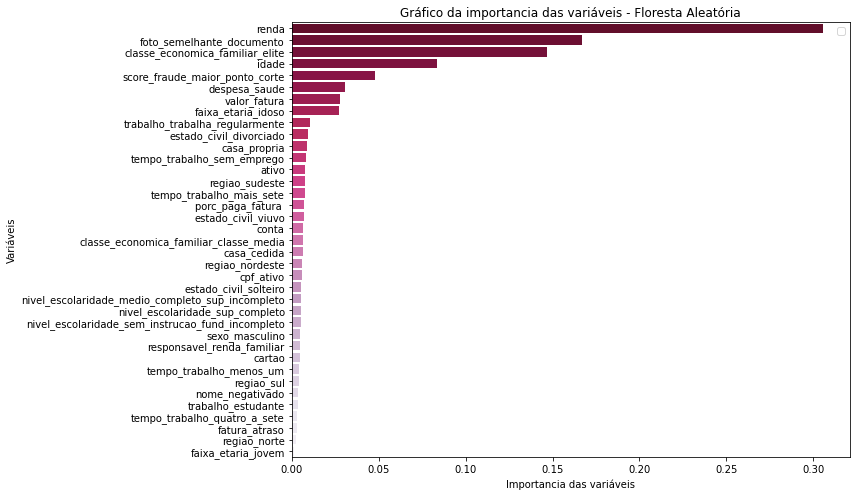

In [53]:
feature_imp = pd.Series(rfc5.feature_importances_,index=data1_50.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Floresta Aleatória")
plt.legend()
plt.show()

#### Comparando as técnicas

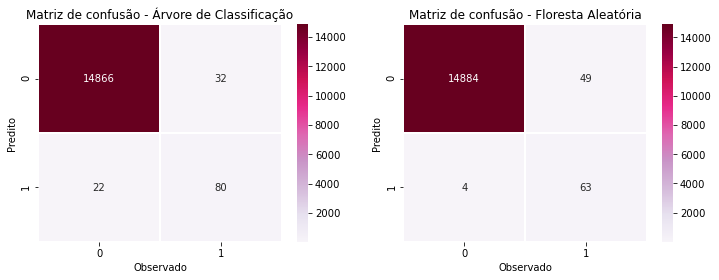

In [54]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix5 = pd.crosstab(y5_pred, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix5, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix5_rf = pd.crosstab(y5_pred_rf, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix5_rf, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

In [43]:
metricas(confusion_matrix5.iloc[1,1], confusion_matrix5.iloc[0,1], confusion_matrix5.iloc[1,0], confusion_matrix5.iloc[0,0])

CAT =  0.996
CAS =  0.714
CAF =  0.999
VPP =  0.784
VPN =  0.002
PVL =  0.007
MCC =  0.007


In [55]:
metricas(confusion_matrix5_rf.iloc[1,1], confusion_matrix5_rf.iloc[0,1], confusion_matrix5_rf.iloc[1,0], confusion_matrix5_rf.iloc[0,0])

CAT =  0.996
CAS =  0.562
CAF =  1.0
VPP =  0.94
VPN =  0.003
PVL =  0.007
MCC =  0.007
